## Chapter 3: Random network

<p> In this code i created an ER graph, having roughly the same amount of nodes and edges than our subreddit graph and then I compared the two. </p>

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import gc
import time
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [2]:
def remove_useless_data(df):
    df_1 = df[df["parent"] == df["to"]]
    # delete duplicate rows from dataframe
    new_df = df.drop(df_1.index)
    #delete useless data to free memory
    del df,df_1
    gc.collect()
    #reset the indexes in the new DataFrame
    new_df.reset_index(inplace=True,drop=True)
    return new_df

def func(x,a,b):
    return a*(x)**(b)

In [5]:
#import and clean data
data = pd.read_csv("../scraping data/data/data_subreddit_cleaned.csv",index_col=0)
no_duplicates = remove_useless_data(data)
G = nx.convert_matrix.from_pandas_edgelist(no_duplicates,source = "parent",target="to",
                                                        edge_attr=True,create_using=nx.MultiDiGraph())

<p>After importing the data, the first problem i faced was to make sure to have an ER graph with the same amount of nodes and edges of the subreddit graph.<br> Startin from the formula: $<L> = p\frac{N(N-1)}{2}$, where $<L>$ is the avarage number of links, N the number of nodes in the graph and p the probability of forming an edge, i computed the probability p necessary to have an ER graph with $<L>$ equal to the number of links in the subreddits graph.</p>

In [7]:
#save number of nodes and number of edges
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
print("Number of nodes: {}, Number of edges: {}".format(n_nodes,n_edges))
#compute the probability k and create ER graph
prob = 2*n_edges/(n_nodes*(n_nodes-1))
print("Probability ER graph to have the same amount on nodes and edges: {:.3f}%".format(prob*100))

Number of nodes: 24819, Number of edges: 199205
Probability ER graph to have the same amount on nodes and edges: 0.065%


<p>After that I computed the degree distribution for the ER graph and the subreddit graph.<br>
    Using a bilogarithmic plot it is easy to see that the subreddit distribution follows a polinomial distribution in the form:
    $ae^{bx}$<br>
Hence i used a simple optimization routine to find the best parameters a,b that best descirbe the subreddit degree distribution. </p>

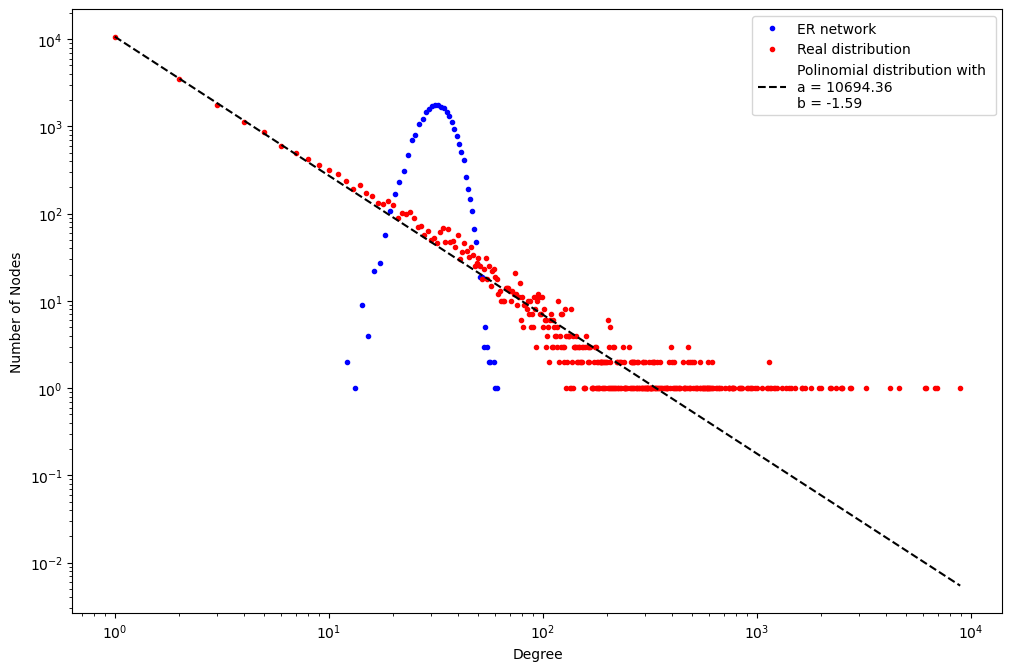

In [20]:
er = nx.fast_gnp_random_graph(n_nodes, prob,directed=True)
fig=plt.figure(figsize=(12,8), dpi= 100)
#compute probability distribution for ER and real graph
hist_er = np.array(nx.degree_histogram(er))
hist = np.array(nx.degree_histogram(G))
#plot degree distribution for ER and real graph
x = np.linspace(0,len(hist_er),len(hist_er))
plt.plot(x, hist_er, ".", label="ER network",color="blue")
xx = np.linspace(1,len(hist),len(hist)-1)
plt.plot(xx, hist[1:], ".",label = "Real distribution",color="red")
#compute best parameter to approximate real distribution
popt, pcov = curve_fit(func, xx, hist[1:],p0=(1e8,-2))
label="Polinomial distribution with \na = {:.2f}\nb = {:.2f}".format(popt[0],popt[1])
plt.plot(xx, func(xx, *popt), color ='black',label=label,ls="--")
# nice plot
plt.loglog()
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.legend()
plt.show()

<p> Lastly I carried out a basic graph analysis of the ER graph</p>

In [33]:
 # clustering and density analysis
a_cluster = nx.average_clustering(er)
density = nx.density(er)
print("Avarage clustering coefficient: {:.5f} \nDensity: {:.5f}".format(a_cluster,density))

Avarage clustering coefficient: 0.00065 
Density: 0.00065


In [22]:
#connected component analysis
n_strong = nx.number_strongly_connected_components(er)
n_weak = nx.number_weakly_connected_components(er)
print(nx.is_strongly_connected(er),n_strong,n_weak)

True 1 1


In [31]:
#regime analysis
mean_k = (n_nodes-1)*prob
print("<k>={:.0f} \nln(N)= {:.0f} \nThis means we are in the supercritical regime".format(mean_k,np.log(n_nodes)))

<k>=16 
ln(N)= 10 
This means we are in the supercritical regime


Per calcolare il diametro e fare path analysis ci vuole troppo tempo faccio andare il pc più in là

In [ ]:
# shortest path analysis
short_lenght = nx.shortest_path_length(er)
mean_short_lenght = nx.average_shortest_path_length(er)
shortest = nx.shortest_path(er)